In [33]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [12]:
def make_rect(a, b, f): #взято из лекции, будет также использоваться для создания прямоугольника из интервала [a; b] для х 
    rect = (a, b-a)
    xm = a + rect[1] / 2.
    return (-f(xm) * rect[1], rect) 

In [190]:

def get_max_elem(lst):
    newlst = list(lst)
    elem=heapq.heappop(newlst)
    return elem, newlst


    
def adapt_rect_list(f, a, b, npts):

    lst = []

    item = make_rect(a, b, f)
    lst.append(item)
    
    for _ in range(npts):
        rect, lst = get_max_elem(lst)
        w, (start, width) = rect
        c = start + width / 2.
        
        rect1 = make_rect(start, c, f)
        rect2 = make_rect(c, start + width, f)
        heapq.heappush(lst, rect1)
        heapq.heappush(lst, rect2)
        #lst.append(rect1)
        #lst.append(rect2)
        
    return -sum(w for w, r in lst), lst

In [223]:
from math import sqrt
f=lambda x: 1/sqrt(x)
a, b = 0, 1
for n in (5, 25, 125, 250, 500, 1000, 5000):
    res, lst = adapt_rect_list(f, a, b, n)
    print ('n, res = ', n, res)

n, res =  5 1.8380899688131436
n, res =  25 1.9584091254649598
n, res =  125 1.9899146211468488
n, res =  250 1.9949521149123017
n, res =  500 1.9974749887697856
n, res =  1000 1.998737230435099
n, res =  5000 1.9997687440832368


In [192]:
%timeit adapt_rect_list(f, a, b, npts=1000)

19.4 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [66]:
%timeit crect(f, a, b, npts=1000)

2.87 ms ± 300 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [67]:
def crect(f, a, b, npts): #взят из лекции метод средних прямоугольников без адаптивной сетки для сравнения результатов 
    h = (b - a) / npts
    summ = 0
    for j in range(npts):
        x = a + h*(j + 0.5)
        summ += f(x)
    return summ * h

In [224]:
from math import exp
adapts=[]
withoutadapt=[]
x=list(range(30, 2000, 10))
for n in x:
    res, lst = adapt_rect_list(f, a, b, n)
    adapts.append(abs(2-res))
    res2=crect(f, a, b, n)
    withoutadapt.append(abs(2-res2)) #мы знаем, что интеграл от нашей функции f на отрезке [0, 1] равен 2
    

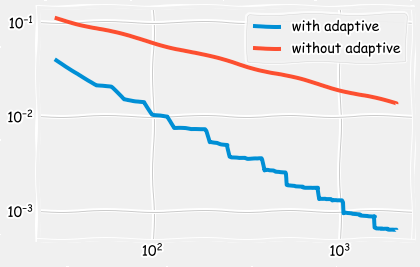

In [225]:
plt.loglog( x, adapts, "-", label='with adaptive' )
plt.loglog(x,withoutadapt, "-", label='without adaptive' )
plt.legend(loc='best')

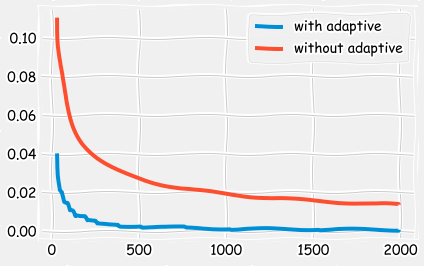

In [226]:
plt.plot( x, adapts, "-", label='with adaptive' )
plt.plot(x,withoutadapt, "-", label='without adaptive' )
plt.legend(loc='best')

Использование адаптивной сетки позволяет быстрее уменьшать абсолютную величину ошибки 